# Aula 01

In [0]:
import pandas as pd

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [0]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
avaliacoes_com_titulo = avaliacoes.join(filmes.set_index('filmeId'), on='filmeId').filter(["usuarioId", "filmeId", "nota", "titulo"])
avaliacoes_com_titulo.head()

,usuarioId,filmeId,nota,titulo
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"


In [0]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [0]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [0]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.columns = ["filmeId", "titulo", "generos", "media"]
filmes_com_media.head()

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
filmes_com_media.sort_values("media", ascending=False).head(15)

,filmeId,titulo,generos,media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


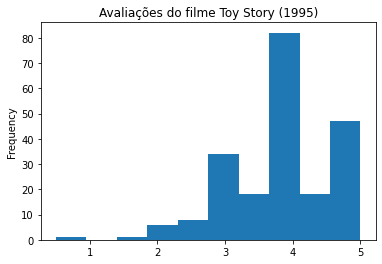

In [0]:
import matplotlib.pyplot as plt

filmeId = 1
nomeFilme = filmes.query(f'filmeId == {filmeId}')['titulo']
avaliacoes.query(f"filmeId == {filmeId}")["nota"].plot(kind="hist")
plt.title(f"Avaliações do filme {nomeFilme.item()}")
plt.show()

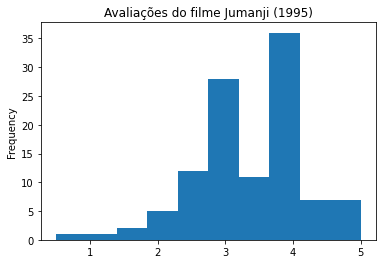

In [0]:
filmeId = 2
nomeFilme = filmes.query(f'filmeId == {filmeId}')['titulo']
avaliacoes.query(f"filmeId == {filmeId}")["nota"].plot(kind="hist")
plt.title(f"Avaliações do filme {nomeFilme.item()}")
plt.show()

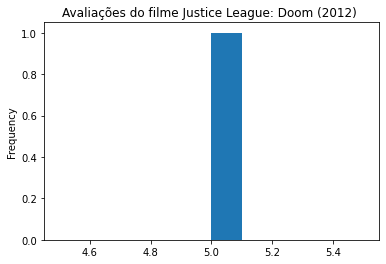

In [0]:
filmeId = 102084
nomeFilme = filmes.query(f'filmeId == {filmeId}')['titulo']
avaliacoes.query(f"filmeId == {filmeId}")["nota"].plot(kind="hist")
plt.title(f"Avaliações do filme {nomeFilme.item()}")
plt.show()

## (Desafio 1) Filmes sem avaliação:

In [0]:
filmes_sem_nota = filmes_com_media[filmes_com_media.media.isnull()]
filmes_sem_nota['titulo']

816                            Innocents, The (1961)
2211                                  Niagara (1953)
2499                          For All Mankind (1989)
2587    Color of Paradise, The (Rang-e khoda) (1999)
3118                  I Know Where I'm Going! (1945)
4037                              Chosen, The (1981)
4506     Road Home, The (Wo de fu qin mu qin) (1999)
4598                                  Scrooge (1970)
4704                                    Proof (1991)
5020                       Parallax View, The (1974)
5293                        This Gun for Hire (1942)
5421                    Roaring Twenties, The (1939)
5452                     Mutiny on the Bounty (1962)
5749              In the Realms of the Unreal (2004)
5824                        Twentieth Century (1934)
5837                       Call Northside 777 (1948)
5957                    Browning Version, The (1951)
7565                              Chalet Girl (2011)
Name: titulo, dtype: object

## (Desafio 2) Nome da coluna como nota_média depois do join

In [0]:
filmes_com_media_coluna_renomeada = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media_coluna_renomeada.columns = ["filmeId", "titulo", "generos", "nota_média"]
filmes_com_media_coluna_renomeada.head()

,filmeId,titulo,generos,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## (Desafio 3) Quantidade de avaliações por filme

In [0]:
qtd_avaliacoes_por_filme = avaliacoes.groupby('filmeId')['usuarioId'].count()
filmes_com_media_qtd_avaliacoes = filmes_com_media.join(qtd_avaliacoes_por_filme, on='filmeId')
filmes_com_media_qtd_avaliacoes.columns = ["filmeId", "titulo", "generos", "media", "qtd_avaliacoes"]
filmes_com_media_qtd_avaliacoes.filter(items=["filmeId", "titulo", "media", "qtd_avaliacoes"]).head()


,filmeId,titulo,media,qtd_avaliacoes
0,1,Toy Story (1995),3.920930,215.0
1,2,Jumanji (1995),3.431818,110.0
2,3,Grumpier Old Men (1995),3.259615,52.0
3,4,Waiting to Exhale (1995),2.357143,7.0
4,5,Father of the Bride Part II (1995),3.071429,49.0


## (Desafio 4) Arrendondando médias

In [0]:
filmes_com_media_arredondada = filmes_com_media_qtd_avaliacoes.filter(items=["filmeId", "titulo", "qtd_avaliacoes"]).join(filmes_com_media_qtd_avaliacoes.media.round(2), on='filmeId')
filmes_com_media_arredondada.head()

,filmeId,titulo,qtd_avaliacoes,media
0,1,Toy Story (1995),215.0,3.43
1,2,Jumanji (1995),110.0,3.26
2,3,Grumpier Old Men (1995),52.0,2.36
3,4,Waiting to Exhale (1995),7.0,3.07
4,5,Father of the Bride Part II (1995),49.0,3.95


## (Desafio 5) Descobrindo gêneros e unicidades

In [0]:
generos = filmes['generos']
generos_separados = generos.str.split('|').explode()
generos_unicos = generos_separados.unique()
generos_unicos

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

## (Desafio 6) Contando quantidade de gêneros

In [0]:
generos_grouped_by_genero = generos_separados.value_counts()
generos_grouped_by_genero

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: generos, dtype: int64

## (Desafio 7) Grafico de distribuição de gêneros

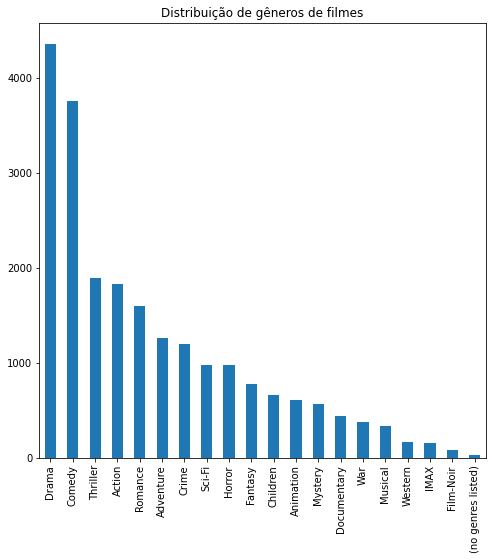

In [0]:
import matplotlib.pyplot as plt

generos_grouped_by_genero.plot(kind='bar', figsize=(8,8))
plt.title(f"Distribuição de gêneros de filmes")
plt.show()

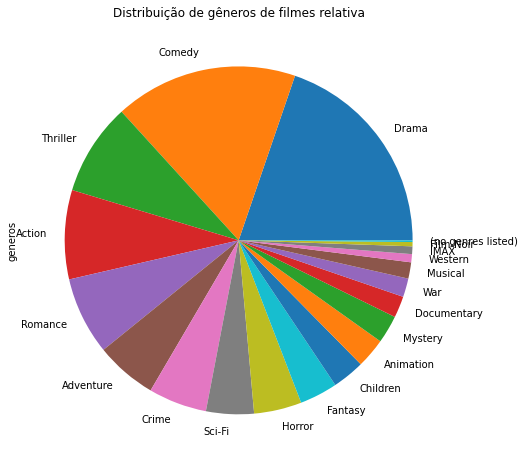

In [0]:
generos_grouped_by_genero.plot(kind='pie', figsize=(8,8))
plt.title(f"Distribuição de gêneros de filmes relativa")
plt.show()

# Aula 02

In [0]:
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [0]:
filmes.index

RangeIndex(start=0, stop=9742, step=1)

In [0]:
filmes.values

array([[1, 'Toy Story (1995)',
        'Adventure|Animation|Children|Comedy|Fantasy'],
       [2, 'Jumanji (1995)', 'Adventure|Children|Fantasy'],
       [3, 'Grumpier Old Men (1995)', 'Comedy|Romance'],
       ...,
       [193585, 'Flint (2017)', 'Drama'],
       [193587, 'Bungo Stray Dogs: Dead Apple (2018)',
        'Action|Animation'],
       [193609, 'Andrew Dice Clay: Dice Rules (1991)', 'Comedy']],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


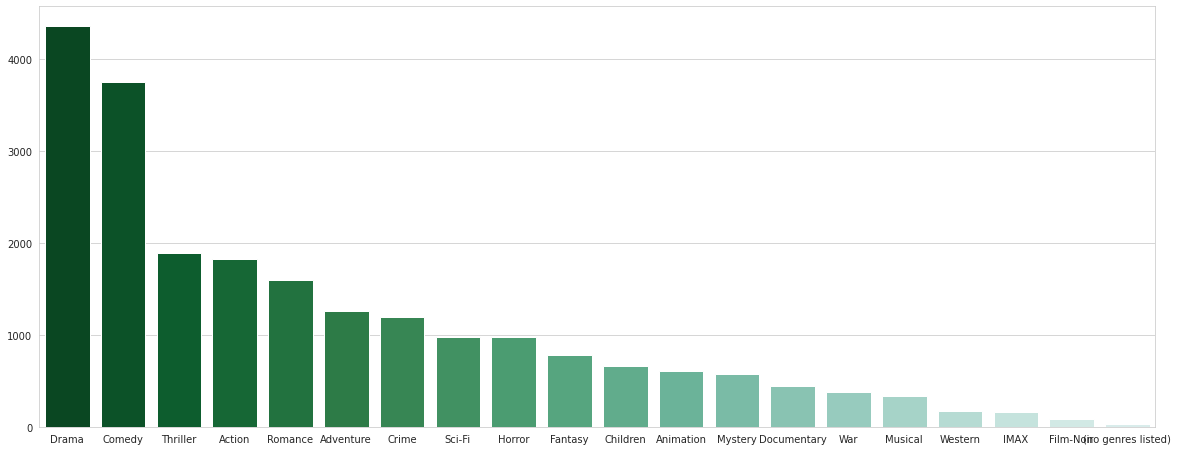

In [0]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.barplot(x=generos_grouped_by_genero.index,
            y=generos_grouped_by_genero.values,
            palette=sns.color_palette('BuGn_r', n_colors=len(generos_grouped_by_genero) + 4))
plt.subplots_adjust(bottom=0.15)
plt.show()

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f'filmeId=={n}')['nota']
  nome_do_filme = filmes.query(f'filmeId=={n}')['titulo']
  notas_do_filme.plot(kind='hist', title=f'{nome_do_filme.item()}')
  return notas_do_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

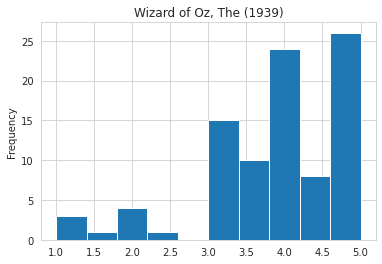

In [0]:
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

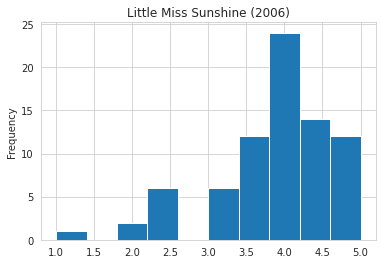

In [0]:
plot_filme(46578)

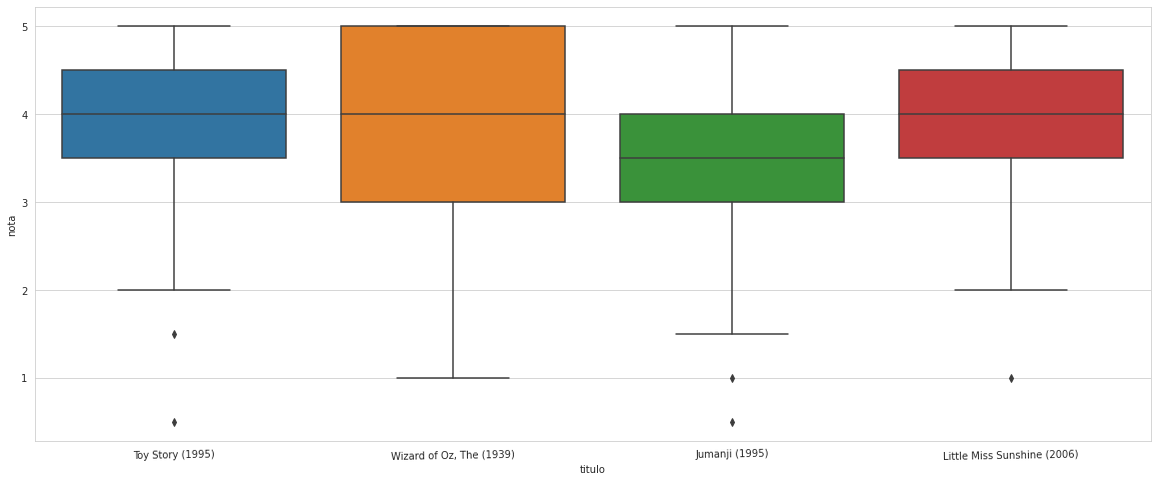

In [0]:
def plot_filme_box(n: [], rotation = 45, detailed = False):
  if len(n)>0: 
    sns.set_style('whitegrid')
    plt.figure(figsize=(20,8))
    chart = sns.boxplot(data=avaliacoes_com_titulo.query(f'filmeId in {n}'), x = 'titulo', y='nota')
    chart.set_xticklabels(labels=chart.get_xticklabels(), rotation=rotation)
    if detailed:
      result = []
      for id in n:
        notas_do_filme = avaliacoes_com_titulo.query(f'filmeId == {id}')['nota']
        nome_do_filme = filmes.query(f'filmeId == {id}')['titulo']
        fig, axes = plt.subplots(ncols=2,figsize=(20,8))
        notas_do_filme.plot(kind='hist', title=f'{nome_do_filme.item()}', ax=axes[0], subplots=True)
        notas_do_filme.plot.box(ax=axes[1], subplots=True)
        plt.show()
        result.append({ 'title': nome_do_filme.item(), 'describe': notas_do_filme.describe() })
      return result

plot_filme_box([919,46578,2,1], True)

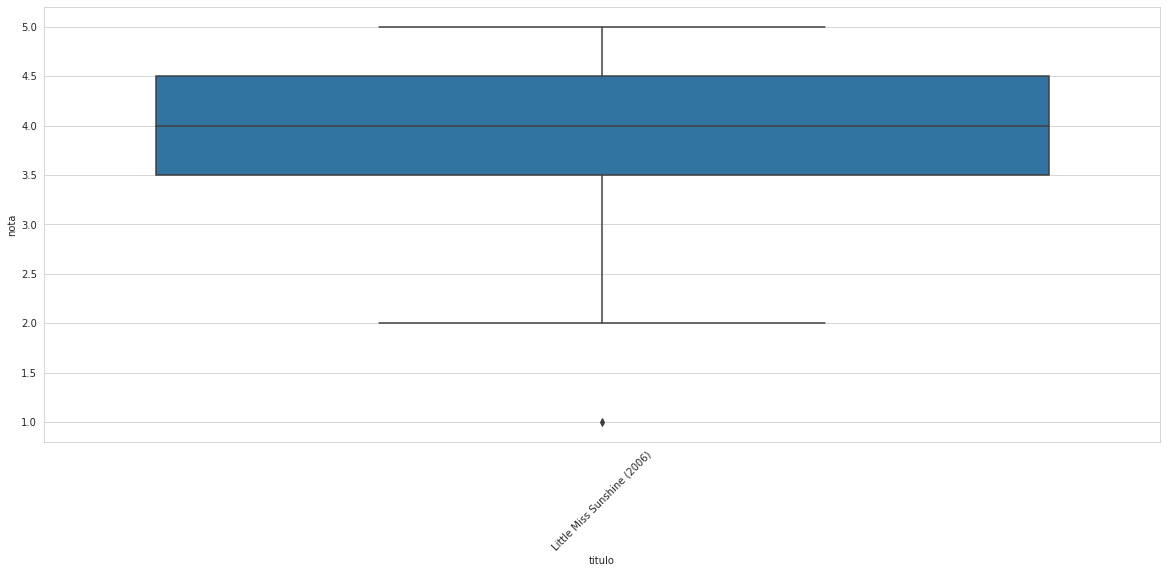

In [0]:
plot_filme_box([46578])

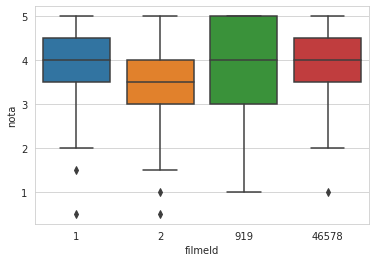

In [0]:
sns.boxplot(data=avaliacoes.query('filmeId in [1,2,919,46578]'), x = 'filmeId', y='nota')

## (Desafio 01) - Rotacionar os ticks do gráfico de barras verde das categorias dos filmes

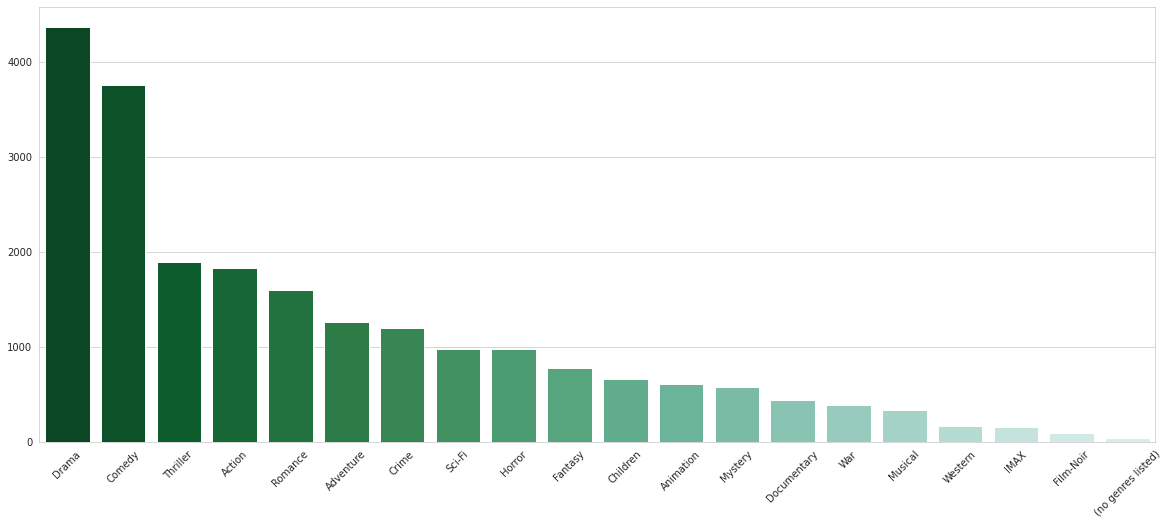

In [0]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
chart = sns.barplot(x=generos_grouped_by_genero.index,
            y=generos_grouped_by_genero.values,
            palette=sns.color_palette('BuGn_r', n_colors=len(generos_grouped_by_genero) + 4))
chart.set_xticklabels(labels=chart.get_xticklabels(), rotation=45)
plt.show()

## (Desafios 02, 03 e 04) 

* Encontrar filmes com médias próximas e distribuiçoes diferentes. 

* Criar boxplot com os 10 filmes mais votados, analisar e tirar conclusões. 

  * Coloquei com a possibilidade de levantar e analizar mais de 10 filmes, basta determinar no `head(x)`

* Configurar visualização do boxplot gerado pelo seaborn com tamanho nomes dos filmes e ticks rotacionados.

  * Olhar a função `plot_filme_box(n=<array_de_filmeId>, rotation=<rotação_desejada_nos_ticks>, detailed=<visão_detalhada?>)`



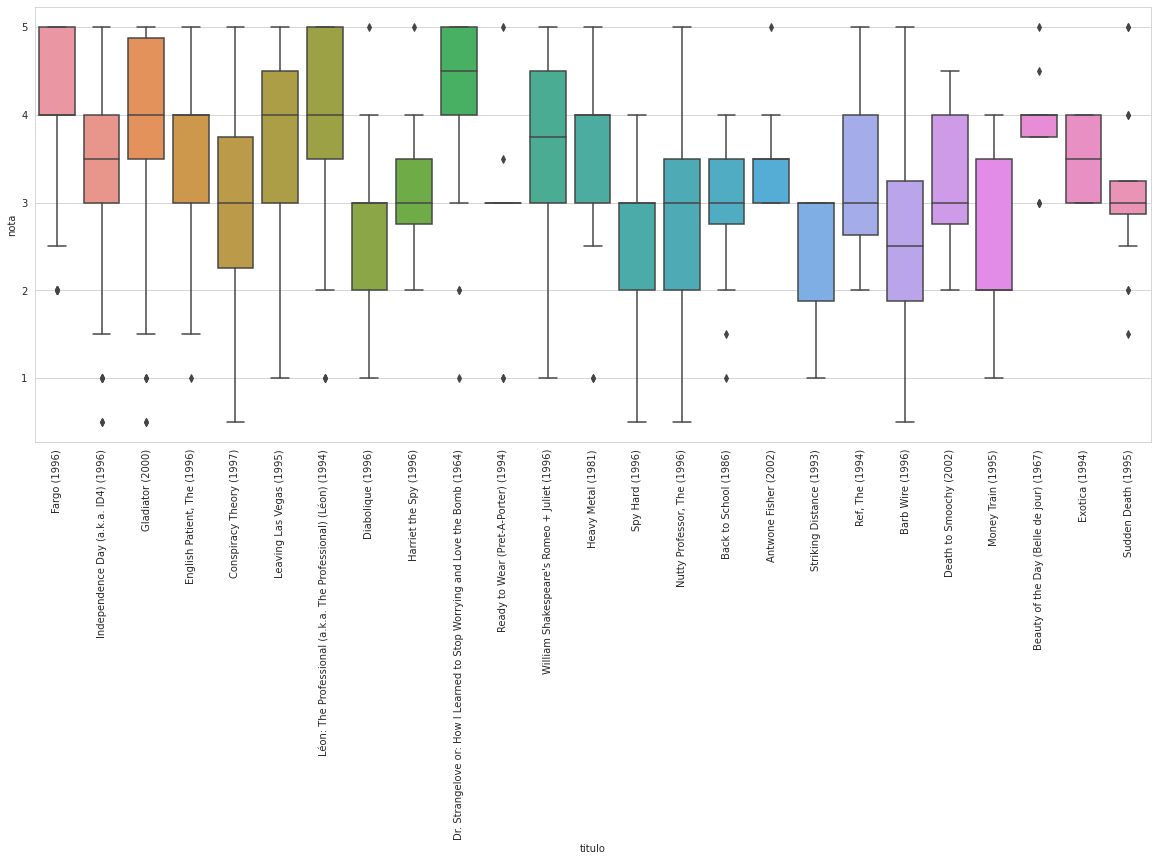

In [0]:
plot_filme_box(filmes_com_media_arredondada.sort_values('media', ascending=False)[2450:2500].sort_values('qtd_avaliacoes', ascending=False).head(25)['filmeId'].values.tolist(), 90)


## (Desafio 05) Calculo de mod, média e mediana dos filmes

In [0]:
filmes_media_proxima_5 = filmes_com_media[filmes_com_media.media.ge(4.7) & filmes_com_media.media.le(5)]
filmes_media_proxima_3 = filmes_com_media[filmes_com_media.media.ge(2.8) & filmes_com_media.media.le(3)]
filmes_media_proxima_half = filmes_media_proxima_5 = filmes_com_media[filmes_com_media.media.ge(0.5) & filmes_com_media.media.lt(1)]

def stats(n):
  base = avaliacoes.query(f'filmeId=={n}')['nota']
  tituloFilme = filmes.query(f'filmeId=={n}')['titulo'].item()
  mean = base.mean()
  median = base.median()
  mode = base.mode()
  result = { 'id': n, 'titulo': tituloFilme, 'média': mean, 'mediana': median, 'moda': mode }
  return result

def print_stats(n):
  result = stats(n)
  titulo = result['titulo']
  id = result['id']
  media = result['média']
  mediana = result['mediana']
  mode = result['moda']
  print(f'Filme: {titulo} - filmeId: {id}\n  Média: {media}\n  Mediana: {mediana}\n  Moda: {mode} \n')

def print_some_stats(n: []):
  for id in n:
    print_stats(id)

print('Filmes com média proxima de 0.5: \n' + '-'*80)
print_some_stats(filmes_media_proxima_half['filmeId'].head(3))
print('Filmes com média proxima de 3.0: \n' + '-'*80)
print_some_stats(filmes_media_proxima_3['filmeId'].head(3))
print('Filmes com média proxima de 5: \n' + '-'*80)
print_some_stats(filmes_media_proxima_5['filmeId'].head(3))


Filmes com média proxima de 0.5: 
--------------------------------------------------------------------------------
Filme: Amityville Curse, The (1990) - filmeId: 1328
  Média: 0.75
  Mediana: 0.75
  Moda: 0    0.5
1    1.0
dtype: float64 

Filme: Gypsy (1962) - filmeId: 3604
  Média: 0.5
  Mediana: 0.5
  Moda: 0    0.5
dtype: float64 

Filme: House Party 2 (1991) - filmeId: 3774
  Média: 0.75
  Mediana: 0.75
  Moda: 0    0.5
1    1.0
dtype: float64 

Filmes com média proxima de 3.0: 
--------------------------------------------------------------------------------
Filme: Tom and Huck (1995) - filmeId: 8
  Média: 2.875
  Mediana: 3.0
  Moda: 0    3.0
dtype: float64 

Filme: Cutthroat Island (1995) - filmeId: 15
  Média: 3.0
  Mediana: 3.0
  Moda: 0    4.0
dtype: float64 

Filme: Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) - filmeId: 30
  Média: 3.0
  Mediana: 4.0
  Moda: 0    4.0
dtype: float64 

Filmes com média proxima de 5: 
---------------------------------------------------

## (Desafio 06) Plotar boxplot e histograma lado-a-lado

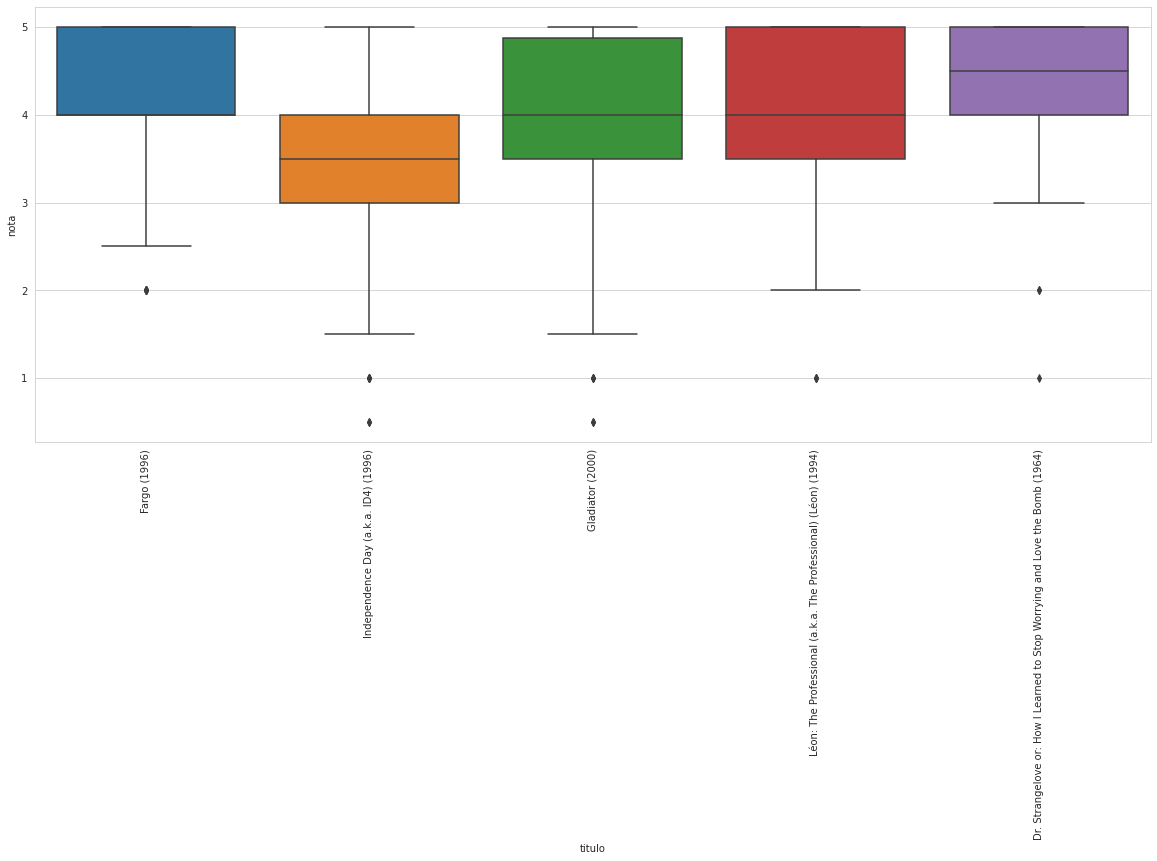

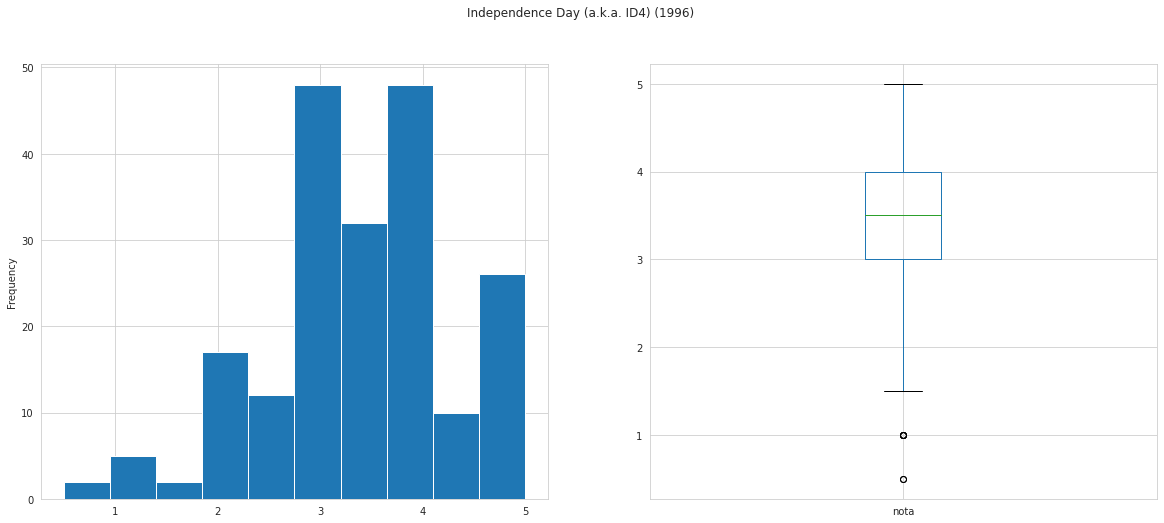

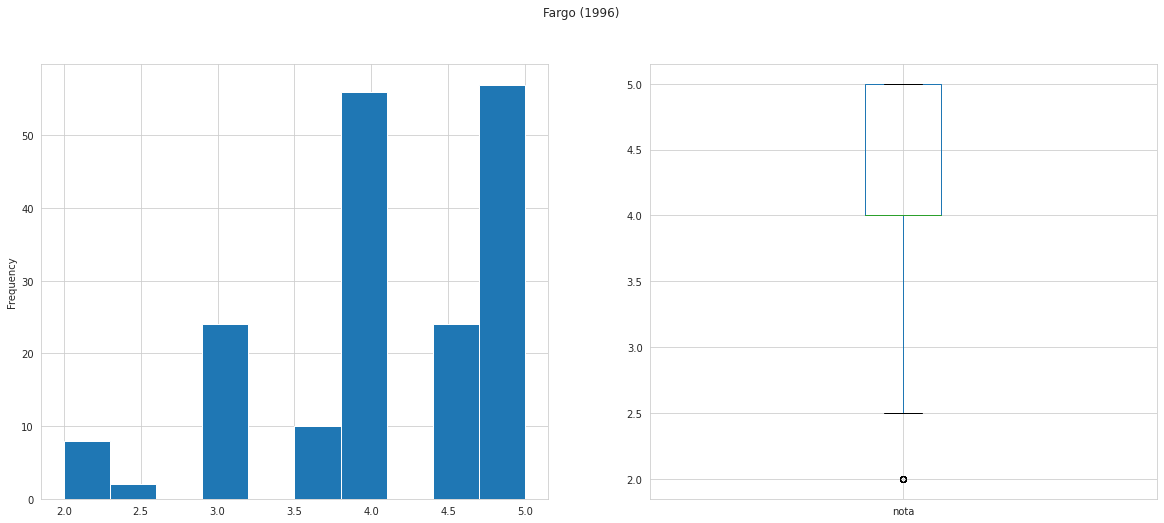

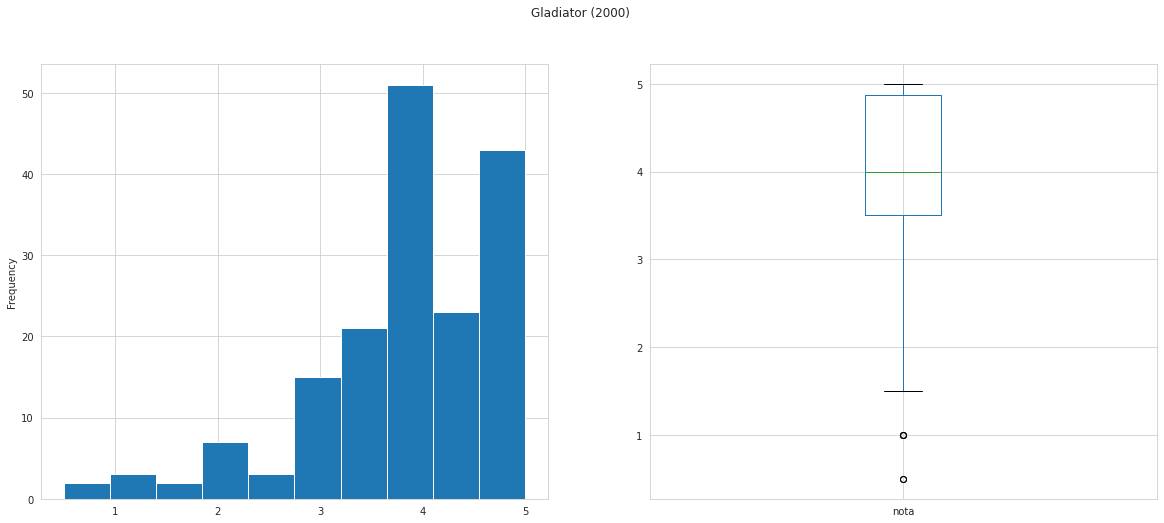

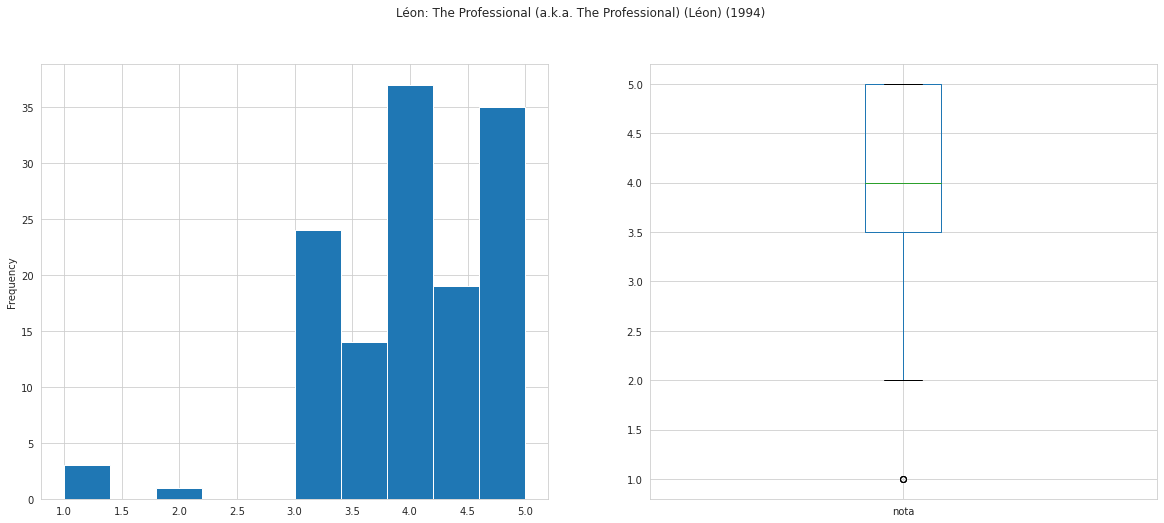

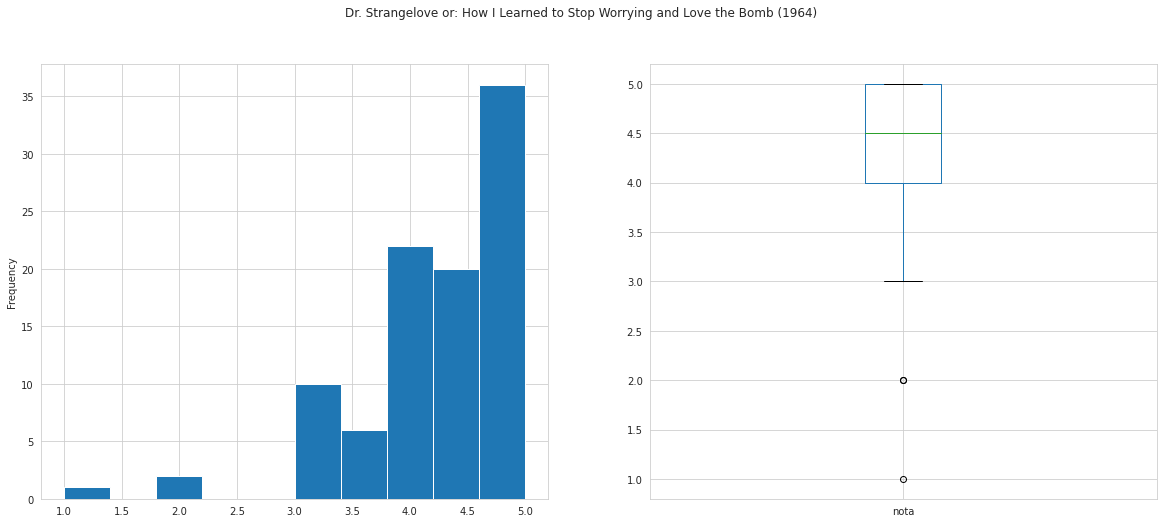

[{'describe': count    202.000000
  mean       3.445545
  std        0.996014
  min        0.500000
  25%        3.000000
  50%        3.500000
  75%        4.000000
  max        5.000000
  Name: nota, dtype: float64, 'title': 'Independence Day (a.k.a. ID4) (1996)'},
 {'describe': count    181.000000
  mean       4.116022
  std        0.828531
  min        2.000000
  25%        4.000000
  50%        4.000000
  75%        5.000000
  max        5.000000
  Name: nota, dtype: float64, 'title': 'Fargo (1996)'},
 {'describe': count    170.000000
  mean       3.938235
  std        0.994367
  min        0.500000
  25%        3.500000
  50%        4.000000
  75%        4.875000
  max        5.000000
  Name: nota, dtype: float64, 'title': 'Gladiator (2000)'},
 {'describe': count    133.000000
  mean       4.018797
  std        0.862532
  min        1.000000
  25%        3.500000
  50%        4.000000
  75%        5.000000
  max        5.000000
  Name: nota, dtype: float64,
  'title': 'Léon: The 

In [0]:
plot_filme_box(filmes_com_media_arredondada.sort_values('media', ascending=False)[2450:2500].sort_values('qtd_avaliacoes', ascending=False).head(5)['filmeId'].values.tolist(), 90, True)


## (Desafio 07) Gráfico de notas médias por ano

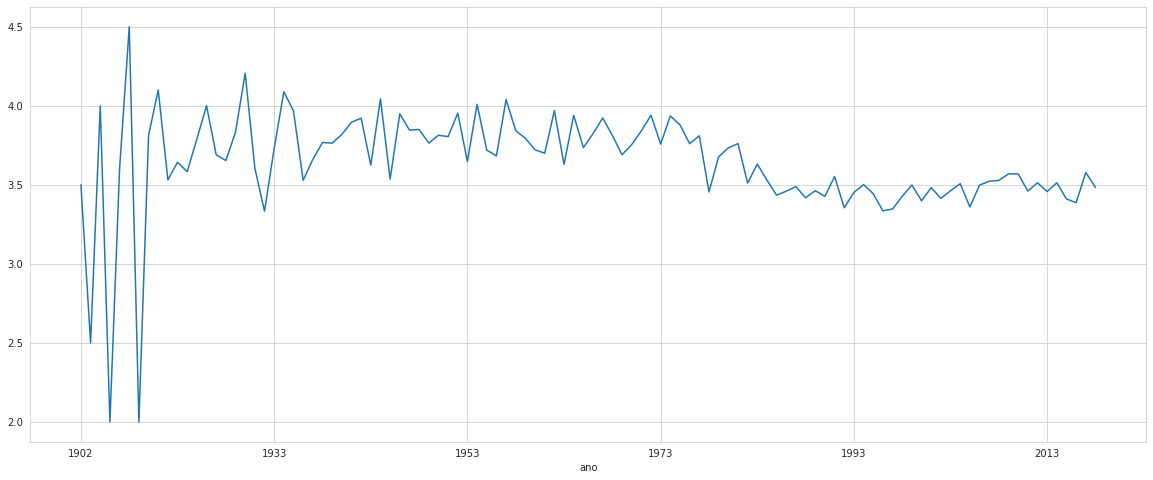

In [0]:
avaliacoes_com_titulo['ano'] = avaliacoes_com_titulo['titulo'].str.extract('(.*)\((\d{4})\)', expand=False)[1]
avaliacoes_com_titulo.dropna()
media_por_ano = avaliacoes_com_titulo.groupby('ano')['nota'].mean()
plt.figure(figsize=(20,8))
media_por_ano.plot()

# Aula 03